Plotting with Sigmoid Activation...


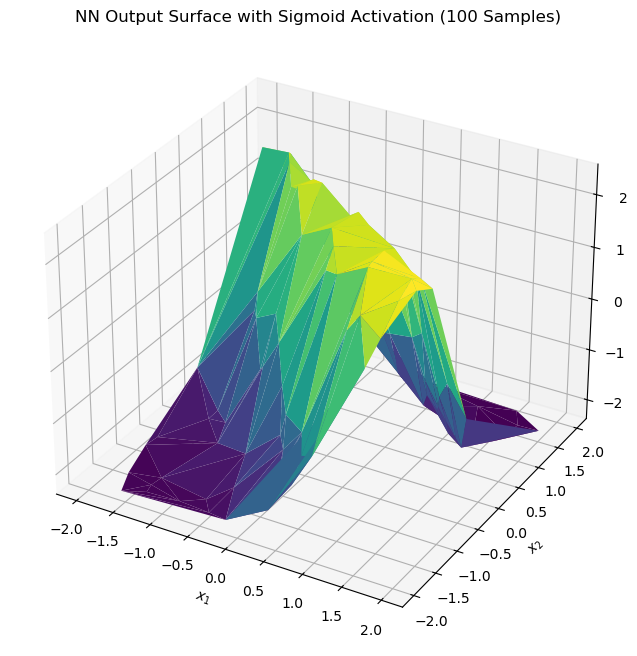

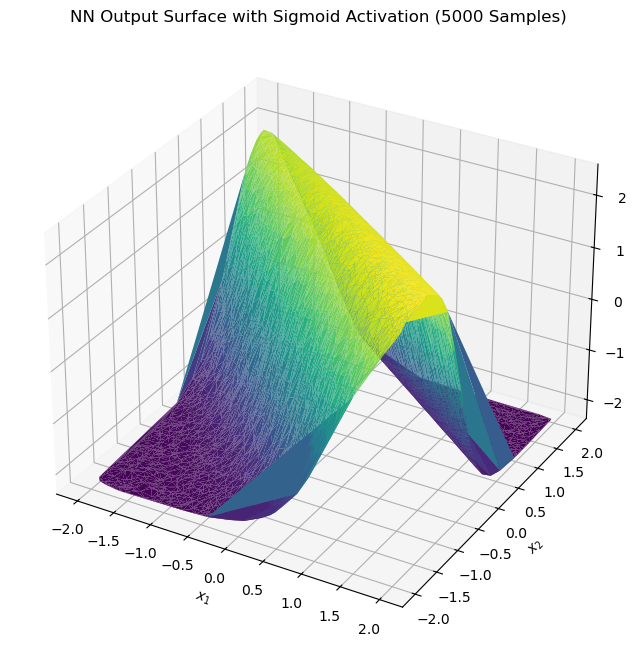

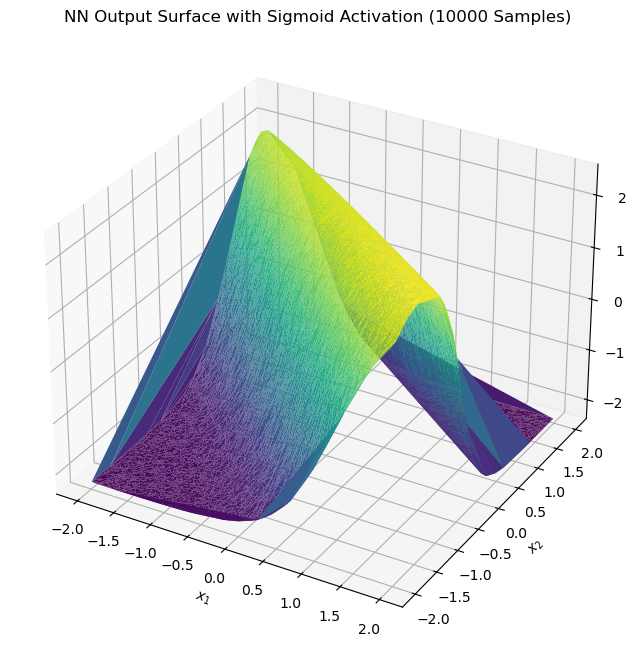

Plotting with Hard Limit Activation...


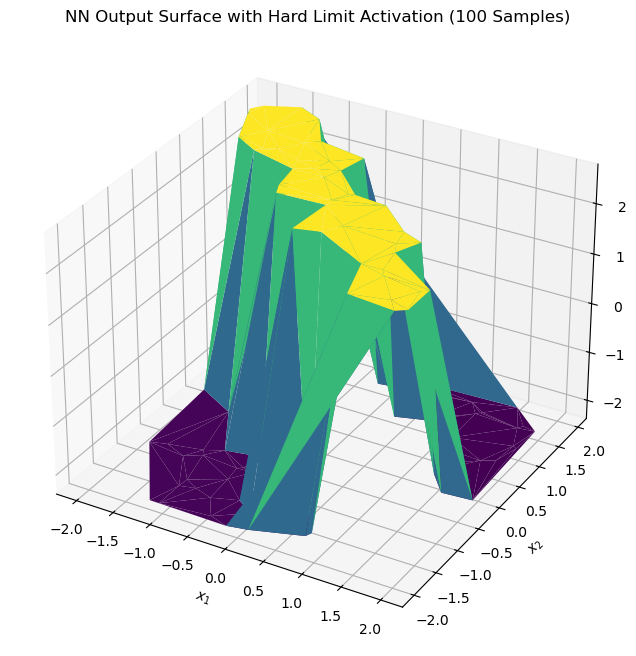

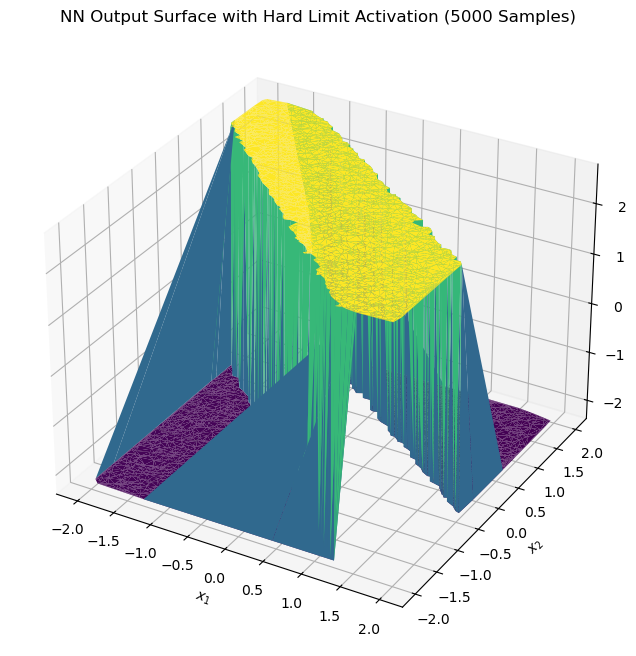

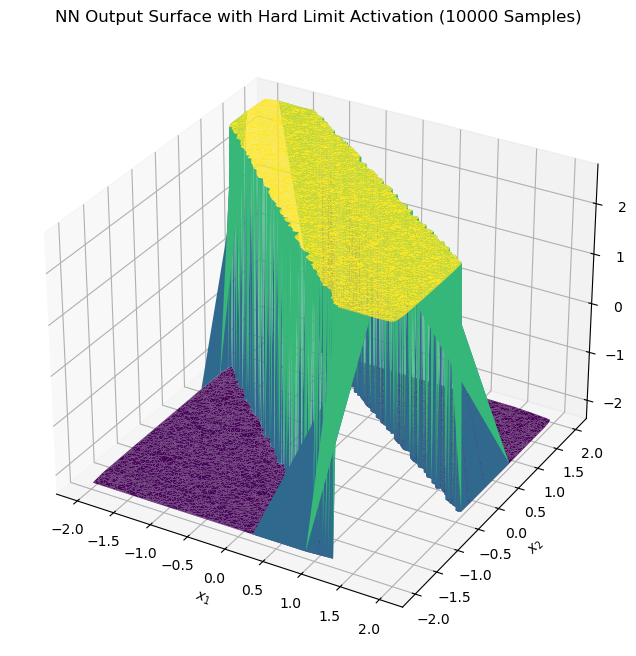

Plotting with Radial Basis Function Activation...


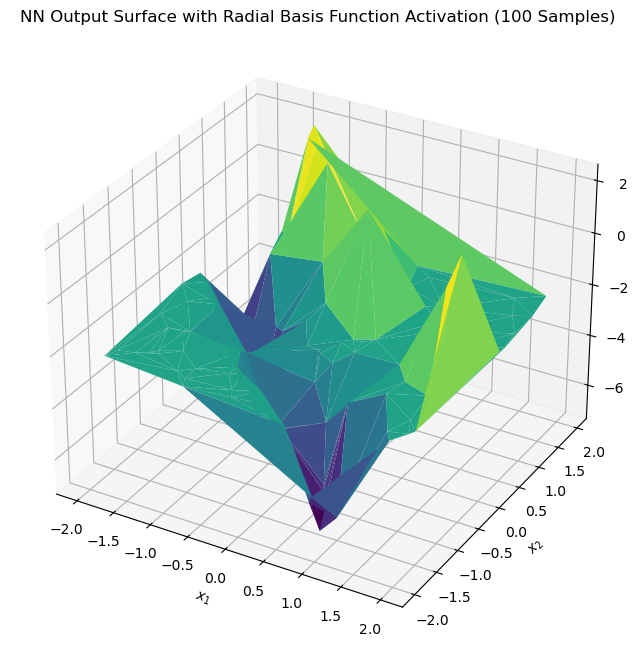

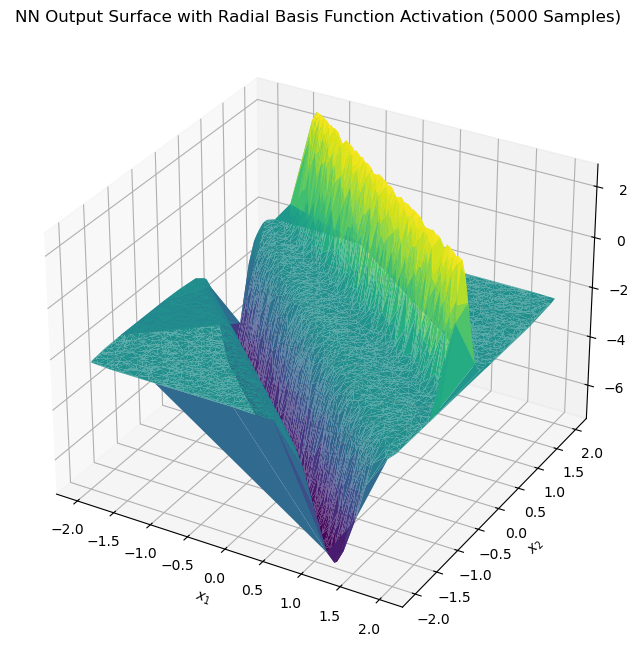

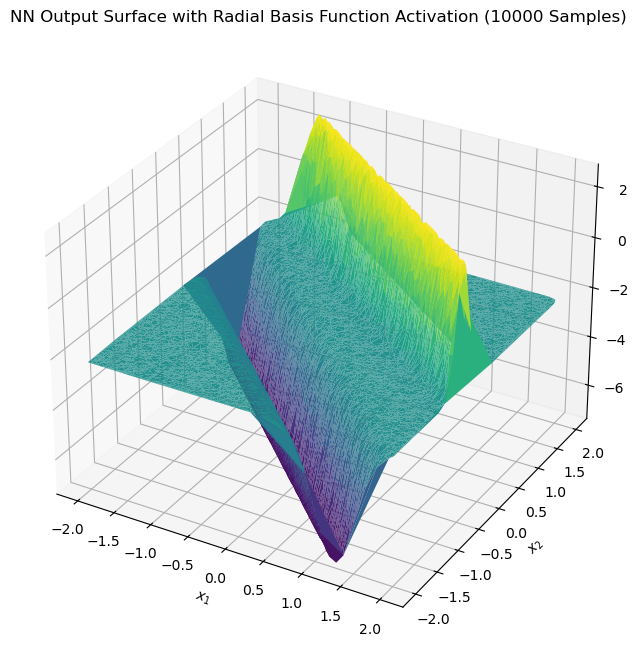

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def sigmoid(z):
    
    # Computes the sigmoid activation function.
    
    return 1 / (1 + np.exp(-z))

def hard_limit(z):
    
    #Computes the hard limit activation function.

    return (z >= 0).astype(float)

def radial_basis_function(z):
    
    # Computes a Radial Basis Function (RBF) for a two-layer NN.

    # Applies the RBF function element-wise to each value in the input array.

    return np.exp(-z**2)

def two_layer_nn_output(x, activation_func):
    
    # Calculates the output of the two-layer neural network.

    # Define the weight matrices and biases
    V_T = np.array([[-2.69, -2.80],
                    [-3.39, -4.56]])
    
    b_v = np.array([[-2.21],
                    [4.76]])
    
    W_T = np.array([[-4.91, 4.95]])
    
    b_w = -2.28
    
    # Calculate the weighted sum for the hidden layer.
    weighted_sum_v = np.dot(V_T, x) + b_v
    
    # Apply the activation function to the hidden layer's output.
    hidden_layer_output = activation_func(weighted_sum_v)
    
    # Calculate the final output.
    output = np.dot(W_T, hidden_layer_output) + b_w
    
    return output.flatten()

def plot_surface(activation_name, num_samples, activation_func):
    
    # Generates and plots a 3D surface of the neural network's output.

    # Define the domain for x1 and x2
    domain_min = -2
    domain_max = 2

    # Generate random sample points for x1 and x2 within the domain.
    x_rand = np.random.uniform(domain_min, domain_max, (2, num_samples))

    # Calculate the corresponding output y for each sample point.
    y = two_layer_nn_output(x_rand, activation_func)
    
    # Extract the individual x1 and x2 values from the input matrix for plotting
    x1_rand = x_rand[0, :]
    x2_rand = x_rand[1, :]

    # Create a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface using plot_trisurf
    ax.plot_trisurf(x1_rand, x2_rand, y, cmap='viridis')

    # Set labels and title for the plot
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$y$')
    ax.set_title(f'NN Output Surface with {activation_name} Activation ({num_samples} Samples)')

    plt.show()

if __name__ == "__main__":
    sample_sizes = [100, 5000, 10000]

    # Part (a): Sigmoid Activation
    print("Plotting with Sigmoid Activation...")
    for num_samples in sample_sizes:
        plot_surface("Sigmoid", num_samples, sigmoid)
    
    # Part (b): Hard Limit Activation
    print("Plotting with Hard Limit Activation...")
    for num_samples in sample_sizes:
        plot_surface("Hard Limit", num_samples, hard_limit)

    # Part (c): Radial Basis Function (RBF) Activation
    print("Plotting with Radial Basis Function Activation...")
    for num_samples in sample_sizes:
        plot_surface("Radial Basis Function", num_samples, radial_basis_function)
